**Aproksymacja**

In [67]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

**Zadanie 1.**

In [68]:
# Data
m_range = range(0, 7)

years = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
population = np.array([76094000, 92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805])

true_value = 248709873

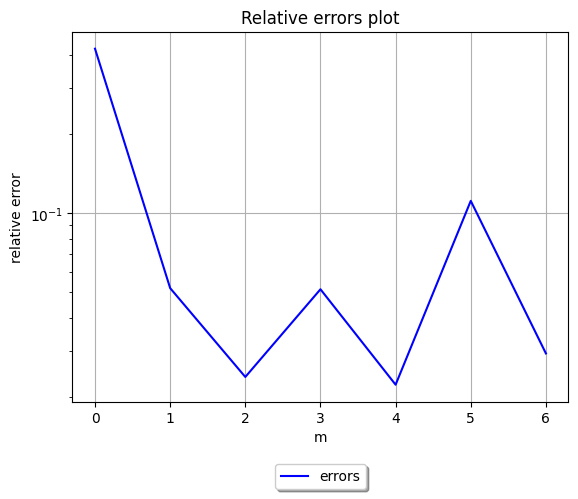

In [69]:
# Least squares polynomial fit approximation
errors = []
for m in m_range:
    c = np.polyfit(years, population, m)
    polynomial = lambda x: np.sum(c*np.array([x**i for i in range(m,-1,-1)]))
    extrapolated_value = polynomial(1990)
    errors.append(np.abs((true_value-extrapolated_value)/true_value))

# Errors plot
plt.title("Relative errors plot")
plt.plot(m_range, errors, color="blue", label="errors")
plt.yscale("log")
plt.xlabel("m")
plt.ylabel("relative error")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

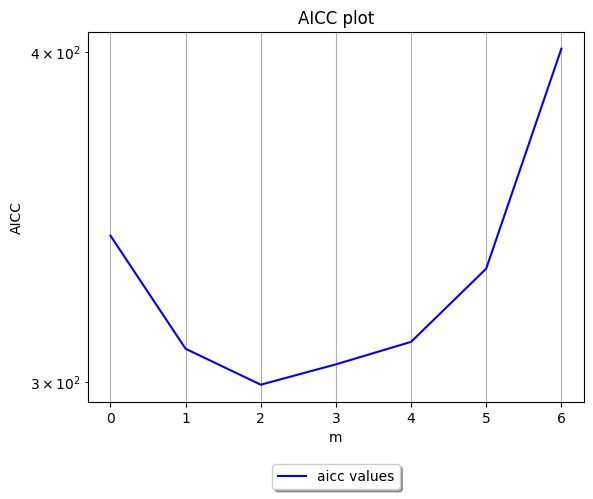

In [70]:
n = 9

# Akaike information criterion - AIC
aicc_list = []
for m in m_range:
    c = np.polyfit(years, population, m)
    polynomial = np.vectorize(lambda x: np.sum(c*np.array([x**i for i in range(m,-1,-1)])))
    predicted_values = polynomial(years)
    sse = np.sum((population-predicted_values)**2)
    k = m + 1
    aic = 2*k + n*np.log(sse)
    aicc = aic + 2*k*(k+1)/(n-k-1)
    aicc_list.append(aicc)

# AICC plot
plt.title("AICC plot")
plt.plot(m_range, aicc_list, color="blue", label="aicc values")
plt.yscale("log")
plt.xlabel("m")
plt.ylabel("AICC")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

**Zadanie 2.**

/tmp/ipykernel_14560/181745886.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_chebyshev, y_chebyshev, 'bo', color='black', label='approximation points')


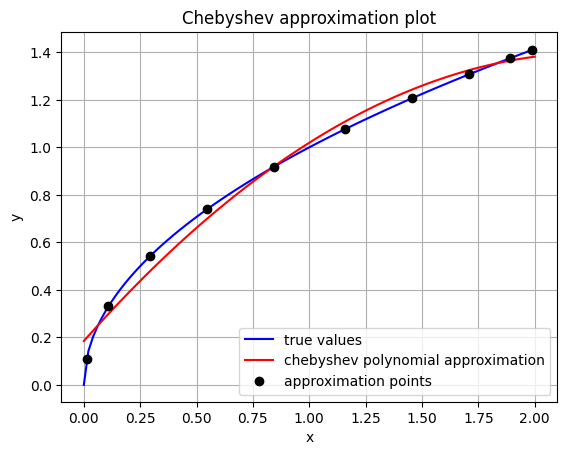

In [75]:
f = lambda x: np.sqrt(x)
a = 0
b = 2
n = 10
x_chebyshev = (a+b)/2 + (b-a)/2 * np.cos((2*np.arange(1, n+1)-1)*np.pi/(2 * n))
y_chebyshev = f(x_chebyshev)
coeffs_cheb = np.polynomial.chebyshev.chebfit(x_chebyshev, y_chebyshev, 2)
x_values = np.linspace(a, b, 100)
y_values_approx = np.polynomial.chebyshev.chebval(x_values, coeffs_cheb)

plt.title("Chebyshev approximation plot")
plt.plot(x_values, f(x_values), color='blue', label='true values')
plt.plot(x_values, y_values_approx, color='red', label='chebyshev polynomial approximation')
plt.plot(x_chebyshev, y_chebyshev, 'bo', color='black', label='approximation points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()